In [1]:
#installing packages needed
!pip install yfinance pandas-datareader plotly seaborn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------------- 949.2/949.2 kB 14.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 13.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=cbf713129ab7dafd66a0123912f69e1026935d658bef600d5167a46b98094e47
  Stored in directory: c:\users\abhin\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab6

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#setting up plotting to show graphs in the notebook
%matplotlib inline

print("All packages installed and imported successfully!")

All packages installed and imported successfully!


In [6]:
#load kaggle dataset
df_original = pd.read_csv(r"C:\Users\Abhin\OneDrive\Documents\[01] Projects\Portfolio projects\Finanace_Economics_dataset_2000_to_Present\archive (1)\finance_economics_dataset.csv")

print("Original dataset overview")
print(f"Shape: {df_original.shape}") #shows rows and columns
print(f"Columns: {df_original.columns}") #shows all column names

print("\n First 5 rows of data:")
df_original.head()

Original dataset overview
Shape: (3000, 24)
Columns: Index(['Date', 'Stock Index', 'Open Price', 'Close Price', 'Daily High',
       'Daily Low', 'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)',
       'Consumer Confidence Index', 'Government Debt (Billion USD)',
       'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY',
       'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)',
       'Real Estate Index', 'Retail Sales (Billion USD)',
       'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals',
       'Venture Capital Funding (Billion USD)',
       'Consumer Spending (Billion USD)'],
      dtype='object')

 First 5 rows of data:


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [7]:
#import the library for getting economic data
import pandas_datareader as pdr #pandas_datareader connects to financial databases (FRED - Federal Reserve Economic Data)
from datetime import datetime

In [10]:
#Define economic indicators
#ticker symbols that FRED uses
economic_indicators = {
    'UNRATE': 'Unemployment_Rate',  #% of people unemployed
    'CPIAUCSL': 'Inflation_CPI',  #consumer price index (inflation measure)
    'FEDFUNDS': 'Federal_Funds_Rate',  #interest rate set by Fed
    'DGS10': 'Treasury_10Y',  #10-year treasury bond yield
    'DGS3MO': '3Month_Treasury',  #3-month treasury bill yield
    'VIXCLS': 'VIX_Volatility',  #market fear index
    'GDP': 'GDP_Billions'  #gross domestic product
}

#function to download data from FRED
def get_economic_data(indicators, start_date='2000-01-01'):
    economic_data = {}
    for symbol, name in indicators.items():
        try:
            data = pdr.get_data_fred(symbol, start=start_date)
            economic_data[name] = data[symbol]
            print(f"Downloaded {name}")
        except Exception as e:
            print(f"Failed to download {name}: {e}")

    return pd.DataFrame(economic_data)

print('Downloading economic indicators from FRED')
economic_df = get_economic_data(economic_indicators)

print(f"\nEconomic data shape: {economic_df.shape}")
print('First 5 rows of economic data:')
economic_df.head()

Downloaded Unemployment_Rate
Downloaded Inflation_CPI
Downloaded Federal_Funds_Rate
Downloaded Treasury_10Y
Downloaded 3Month_Treasury
Downloaded VIX_Volatility
Downloaded GDP_Billions

Economic data shape: (6796, 7)
First 5 rows of economic data:


,Unemployment_Rate,Inflation_CPI,Federal_Funds_Rate,Treasury_10Y,3Month_Treasury,VIX_Volatility,GDP_Billions
DATE,,,,,,,
2000-01-01,4.0,169.3,5.45,NaN,NaN,NaN,10002.179
2000-01-03,NaN,NaN,NaN,6.58,5.48,24.21,NaN
2000-01-04,NaN,NaN,NaN,6.49,5.43,27.01,NaN
2000-01-05,NaN,NaN,NaN,6.62,5.44,26.41,NaN
2000-01-06,NaN,NaN,NaN,6.57,5.41,25.73,NaN


In [11]:
#import Yahoo Finance library for market data
import yfinance as yf

In [13]:
#define market indices and ETFs
market_symbols = {
    '^GSPC':'SP500',  #S&P 500 index
    '^IXIC': 'NASDAQ',  #NASDAQ index
    '^DJI': 'Dow_Jones',  #Dow Jones industrial average
    '^VIX': 'VIX_Yahoo',  #VIX from Yahoo
    'GLD': 'Gold_ETF', #Gold prices
    'TLT': 'Long_Treasury_ETF', #20+ year Treasury bonds
    'XLF': 'Financial_Sector',  #Financial sector stocks
    'XLK': 'Tech_Sector'  #Technology sector stocks
}

#download market data from Yahoo Finance
def get_market_data(symbols, start_date='2000-01-01'):
    market_data = {}
    for symbol, name in symbols.items():
        try:
            ticker = yf.Ticker(symbol) #create a ticker object for this symbol
            hist = ticker.history(start=start_date) #download historical data
            market_data[name] = hist['Close'] #keep only the closing price
            print(f"Downloaded {name}")
        except Exception as e:
            print(f"Failed to download {name}: {e}")
            
    return pd.DataFrame(market_data)

print('Downloading market data from Yahoo Finance...')
market_df = get_market_data(market_symbols)

print(f'\nMarket data shape: {market_df.shape}')
print('First 5 rows of market data:')
market_df.head()

Downloaded SP500
Downloaded NASDAQ
Downloaded Dow_Jones
Downloaded VIX_Yahoo
Downloaded Gold_ETF
Downloaded Long_Treasury_ETF
Downloaded Financial_Sector
Downloaded Tech_Sector

Market data shape: (12930, 8)
First 5 rows of market data:


,SP500,NASDAQ,Dow_Jones,VIX_Yahoo,Gold_ETF,Long_Treasury_ETF,Financial_Sector,Tech_Sector
Date,,,,,,,,
2000-01-03 05:00:00+00:00,1455.219971,4131.149902,11357.509766,NaN,NaN,NaN,11.223701,41.419884
2000-01-03 06:00:00+00:00,NaN,NaN,NaN,24.209999,NaN,NaN,NaN,NaN
2000-01-04 05:00:00+00:00,1399.420044,3901.689941,10997.929688,NaN,NaN,NaN,10.733049,39.318531
2000-01-04 06:00:00+00:00,NaN,NaN,NaN,27.010000,NaN,NaN,NaN,NaN
2000-01-05 05:00:00+00:00,1402.109985,3877.540039,11122.650391,NaN,NaN,NaN,10.648720,38.734821


In [18]:
#Data exploration

#date ranges for each dataset
print('Date Range analysis:')
print(f'Original dataset: {df_original.shape[0]} rows')

print(f'\nEconomic data:')
print(f'Start date: {economic_df.index.min()}')
print(f'End date: {economic_df.index.max()}')
print(f'Total rows: {len(economic_df)}')

print(f'\nMarket data:')
print(f'Start date: {market_df.index.min()}')
print(f'End date: {market_df.index.max()}')
print(f'Total rows: {len(market_df)}')

#check for missing data
print('\nMissing Data Check:')
print('Economic data missing values:')
print(economic_df.isnull().sum())

print('\nMarket data missing values:')
print(market_df.isnull().sum())


Date Range analysis:
Original dataset: 3000 rows

Economic data:
Start date: 2000-01-01 00:00:00
End date: 2025-09-16 00:00:00
Total rows: 6796

Market data:
Start date: 2000-01-03 05:00:00+00:00
End date: 2025-09-17 05:00:00+00:00
Total rows: 12930

Missing Data Check:
Economic data missing values:
Unemployment_Rate     6488
Inflation_CPI         6488
Federal_Funds_Rate    6488
Treasury_10Y           367
3Month_Treasury        367
VIX_Volatility         304
GDP_Billions          6694
dtype: int64

Market data missing values:
SP500                6465
NASDAQ               6466
Dow_Jones            6466
VIX_Yahoo            6465
Gold_ETF             7691
Long_Treasury_ETF    7111
Financial_Sector     6466
Tech_Sector          6466
dtype: int64


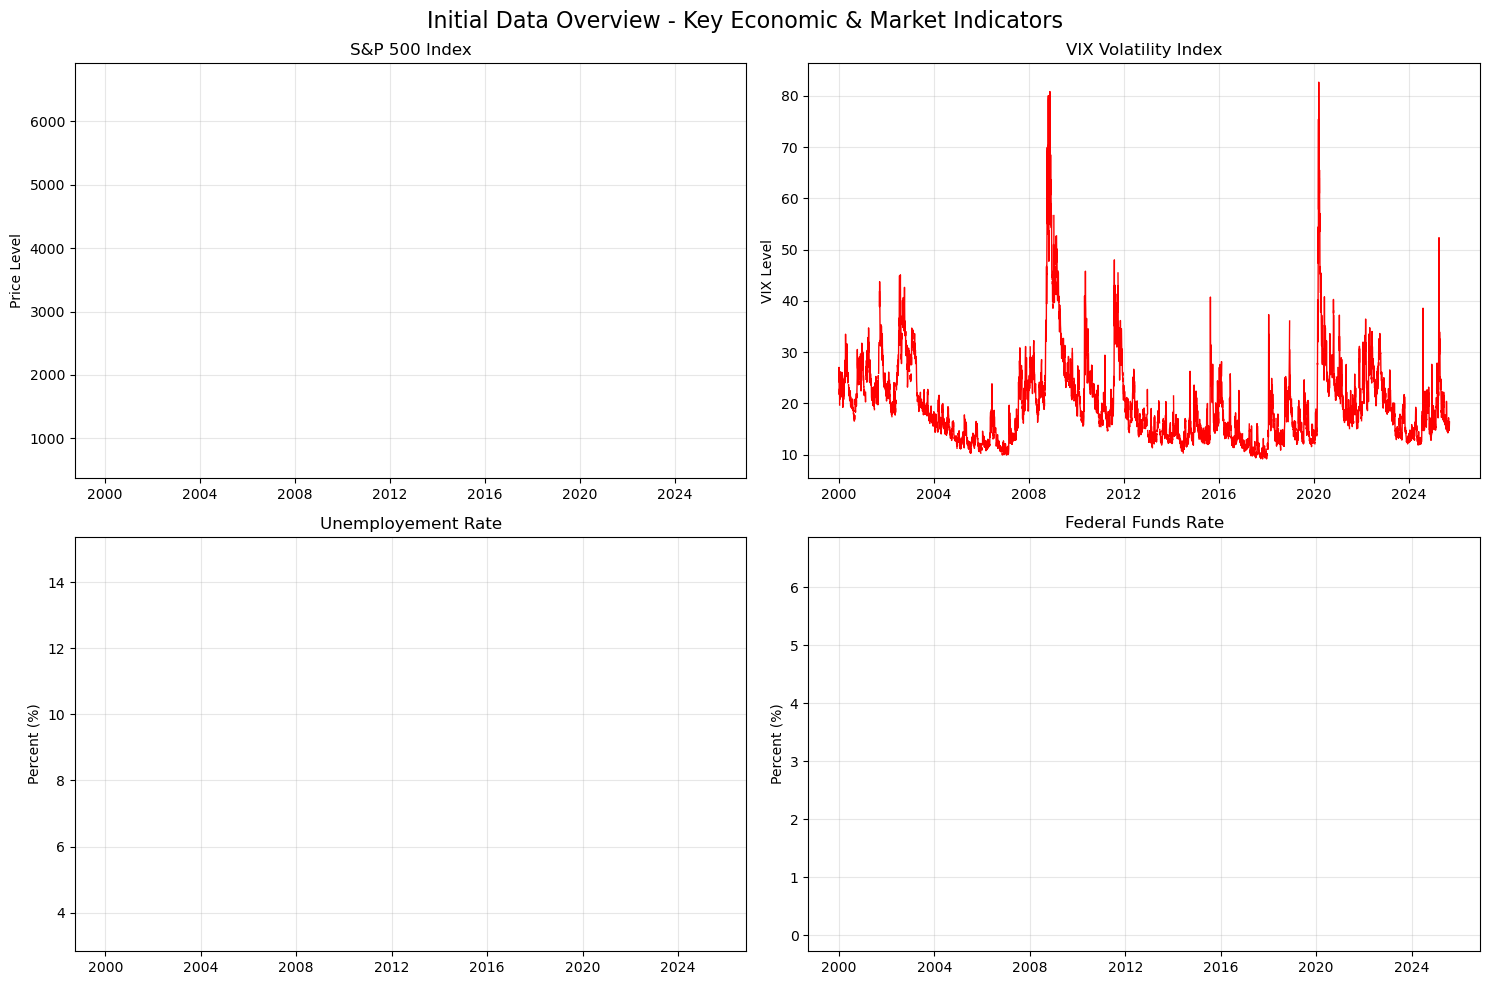

In [26]:
# 2x2 grid plots
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Initial Data Overview - Key Economic & Market Indicators', fontsize = 16)

#plot 1: S&P 500 over time
axes[0,0].plot(market_df.index, market_df['SP500'], color='blue', linewidth=1)
axes[0,0].set_title('S&P 500 Index')
axes[0,0].set_ylabel('Price Level')
axes[0,0].grid(True, alpha=0.3)

#plot 2: VIX (volatility) over time
axes[0,1].plot(economic_df.index, economic_df['VIX_Volatility'], color='red', linewidth=1)
axes[0,1].set_title('VIX Volatility Index')
axes[0,1].set_ylabel('VIX Level')
axes[0,1].grid(True, alpha=0.3)

#plot 3: Unemployment rate
axes[1,0].plot(economic_df.index, economic_df['Unemployment_Rate'], color='green', linewidth=1)
axes[1,0].set_title('Unemployement Rate')
axes[1,0].set_ylabel('Percent (%)')
axes[1,0].grid(True, alpha=0.3)

#plot 4: Federal funds rate
axes[1,1].plot(economic_df.index, economic_df['Federal_Funds_Rate'], color='orange', linewidth=1)
axes[1,1].set_title('Federal Funds Rate')
axes[1,1].set_ylabel('Percent (%)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
#troubleshooting plots 
print('Economic Data info:')
print(f'Date Range: {economic_df.index.min()} to {economic_df.index.max()}')
print(f'Shape: {economic_df.shape}')
print(f'Columns: {list(economic_df.columns)}')
print(f'Index type: {type(economic_df.index)}')

print('\nMarket Data info:')
print(f'Date Range: {market_df.index.min()} to {market_df.index.max()}')
print(f'Shape: {market_df.shape}')
print(f'Columns: {list(market_df.columns)}')
print(f'Index type: {type(market_df.index)}')

#checking if there is data in each column
print('\nData Availability Check:')
for col in economic_df.columns:
    non_null = economic_df[col].count()
    print(f'Economic - {col}: {non_null} non-null values')

for col in market_df.columns:
    non_null = market_df[col].count()
    print(f'Market - {col}: {non_null} non-null values')

Economic Data info:
Date Range: 2000-01-01 00:00:00 to 2025-09-16 00:00:00
Shape: (6796, 7)
Columns: ['Unemployment_Rate', 'Inflation_CPI', 'Federal_Funds_Rate', 'Treasury_10Y', '3Month_Treasury', 'VIX_Volatility', 'GDP_Billions']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Market Data info:
Date Range: 2000-01-03 05:00:00+00:00 to 2025-09-17 05:00:00+00:00
Shape: (12930, 8)
Columns: ['SP500', 'NASDAQ', 'Dow_Jones', 'VIX_Yahoo', 'Gold_ETF', 'Long_Treasury_ETF', 'Financial_Sector', 'Tech_Sector']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Data Availability Check:
Economic - Unemployment_Rate: 308 non-null values
Economic - Inflation_CPI: 308 non-null values
Economic - Federal_Funds_Rate: 308 non-null values
Economic - Treasury_10Y: 6429 non-null values
Economic - 3Month_Treasury: 6429 non-null values
Economic - VIX_Volatility: 6492 non-null values
Economic - GDP_Billions: 102 non-null values
Market - SP500: 6465 non-null values
Market - NAS

In [38]:
#check what data we actually have (non-missing values)
print('Actual Data Available:')
print('\nEconomic Data - Actual data points:')
for col in economic_df.columns:
    non_missing = economic_df[col].count()
    total_rows = len(economic_df)
    percentage = (non_missing / total_rows) * 100
    print(f'{col}: {non_missing:,} points ({percentage:.1f}% of dates)')

    if non_missing > 0:
        valid_data = economic_df[col].dropna()
        print(f'    Date Range: {valid_data.index.min()} to {valid_data.index.max()}')

print('\nMarket Data - Actual data points:')
for col in market_df.columns:
    non_missing = market_df[col].count()
    total_rows = len(market_df)
    percentage = (non_missing / total_rows) * 100
    print(f'{col}: {non_missing:,} points ({percentage:.1f}% of dates)')

    if non_missing > 0:
        valid_data = market_df[col].dropna()
        print(f'    Date Range: {valid_data.index.min()} to {valid_data.index.max()}')

Actual Data Available:

Economic Data - Actual data points:
Unemployment_Rate: 308 points (4.5% of dates)
    Date Range: 2000-01-01 00:00:00 to 2025-08-01 00:00:00
Inflation_CPI: 308 points (4.5% of dates)
    Date Range: 2000-01-01 00:00:00 to 2025-08-01 00:00:00
Federal_Funds_Rate: 308 points (4.5% of dates)
    Date Range: 2000-01-01 00:00:00 to 2025-08-01 00:00:00
Treasury_10Y: 6,429 points (94.6% of dates)
    Date Range: 2000-01-03 00:00:00 to 2025-09-15 00:00:00
3Month_Treasury: 6,429 points (94.6% of dates)
    Date Range: 2000-01-03 00:00:00 to 2025-09-15 00:00:00
VIX_Volatility: 6,492 points (95.5% of dates)
    Date Range: 2000-01-03 00:00:00 to 2025-09-16 00:00:00
GDP_Billions: 102 points (1.5% of dates)
    Date Range: 2000-01-01 00:00:00 to 2025-04-01 00:00:00

Market Data - Actual data points:
SP500: 6,465 points (50.0% of dates)
    Date Range: 2000-01-03 05:00:00+00:00 to 2025-09-17 04:00:00+00:00
NASDAQ: 6,464 points (50.0% of dates)
    Date Range: 2000-01-03 05:00:

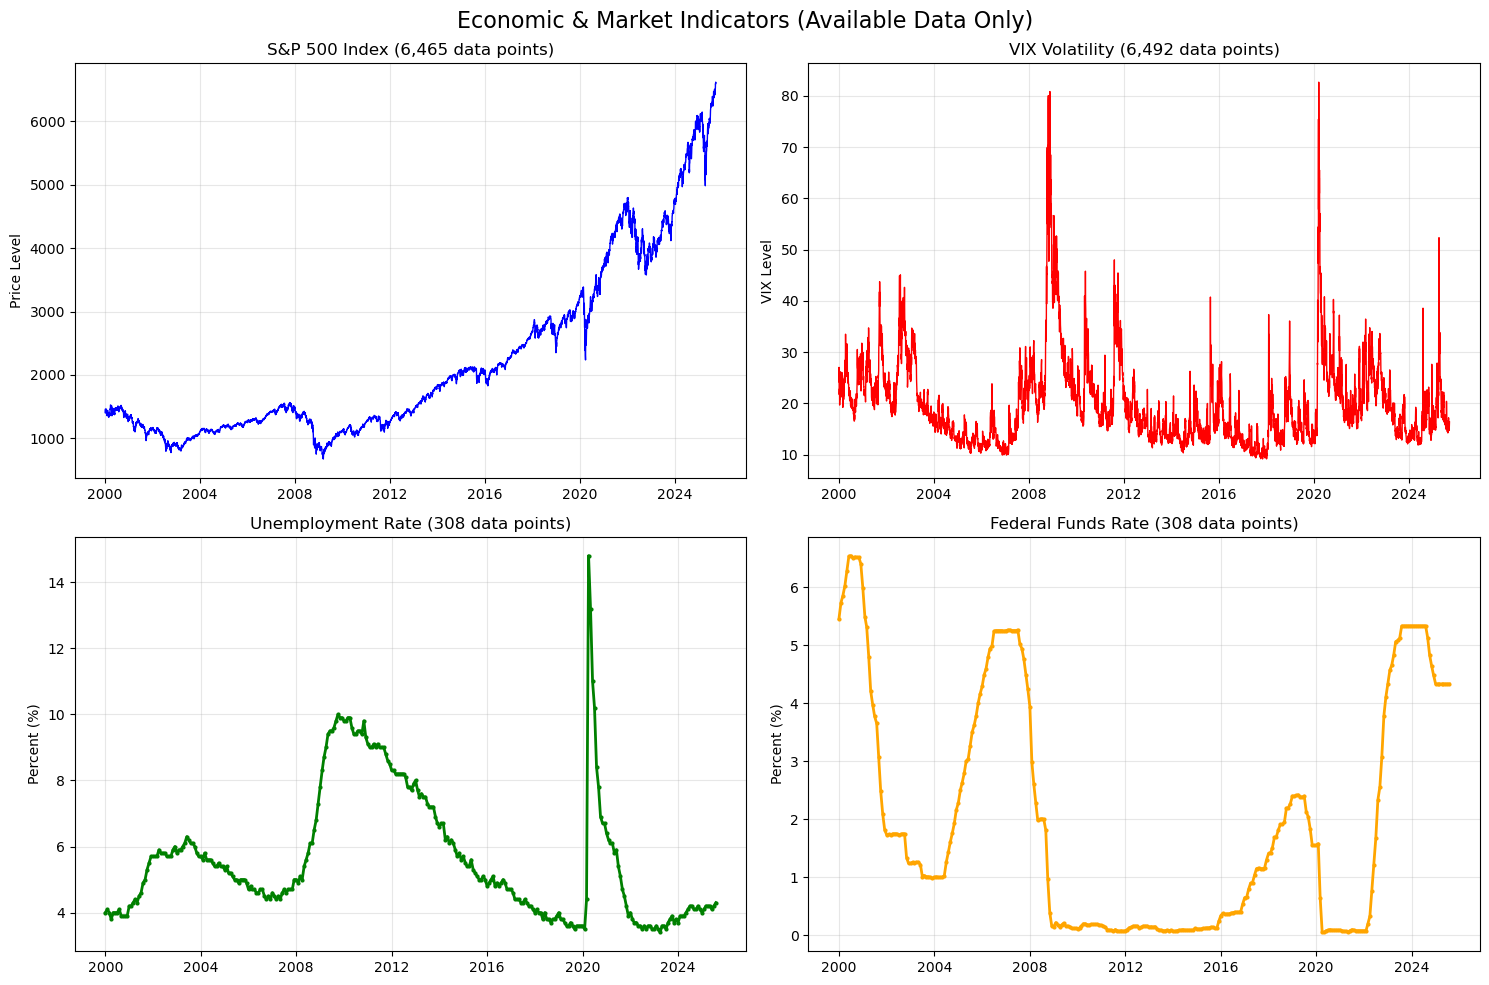

In [45]:
fig, axes = plt.subplots(2, 2, figsize = (15,10))
fig.suptitle('Economic & Market Indicators (Available Data Only)', fontsize=16)

#plot 1: SP500 (6465 points)
sp500_data = market_df['SP500'].dropna()
if len(sp500_data) > 100:
    axes[0,0].plot(sp500_data.index, sp500_data.values, color='blue', linewidth=1)
    axes[0,0].set_title(f'S&P 500 Index ({len(sp500_data):,} data points)')
    axes[0,0].set_ylabel('Price Level')
    axes[0,0].grid(True, alpha=0.3)
else:
    axes[0,0].text(0.5, 0.5, f'SP500: Only {len(sp500_data)} data points',
                  ha='center', va='center', transform=axes[0,0].transAxes)

#plot 2: VIX(6465 points)
vix_data = economic_df['VIX_Volatility'].dropna()
axes[0,1].plot(vix_data.index, vix_data.values, color='red', linewidth=1)
axes[0,1].set_title(f'VIX Volatility ({len(vix_data):,} data points)')
axes[0,1].set_ylabel('VIX Level')
axes[0,1].grid(True, alpha=0.3)

#plot 3: Unemployment (308 points)
unemp_data = economic_df['Unemployment_Rate'].dropna()
if len(unemp_data) > 50:
    axes[1,0].plot(unemp_data.index, unemp_data.values, color='green', linewidth=2, marker = 'o', markersize=2)
    axes[1,0].set_title(f'Unemployment Rate ({len(unemp_data):,} data points)')
    axes[1,0].set_ylabel('Percent (%)')
    axes[1,0].grid(True, alpha=0.3)
else:
    axes[1,0].text(0.5, 0.5, f'Unemployment: Only {len(unemp_data)} data points',
                  ha='center', va='center', transform=axes[1,0].transAxes)

#plot 4: Fed Fund Rates (308 points)
fed_data = economic_df['Federal_Funds_Rate'].dropna()
if len(fed_data) > 50:
    axes[1,1].plot(fed_data.index, fed_data.values, color='orange', linewidth=2, marker='o', markersize=2)
    axes[1,1].set_title(f'Federal Funds Rate ({len(fed_data):,} data points)')
    axes[1,1].set_ylabel('Percent (%)')
    axes[1,1].grid(True, alpha=0.3)
else:
    axes[1,1].text(0.5, 0.5, f'Fed Funds: Only {len(fed_data)} data points',
                  ha='center', va='center', transform=axes[1,1].transAxes)

plt.tight_layout()
plt.show()

In [46]:
economic_df.to_csv('economic_data_clean.csv')
market_df.to_csv('market_data_clean.csv')

print(f'Economic data: {economic_df.shape}')
print(f'Market data: {market_df.shape}')

Economic data: (6796, 7)
Market data: (12930, 8)
